<a href="https://colab.research.google.com/github/DhafinRA/Apriori/blob/main/Apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import os

### PREPROCESS DATA

In [3]:
#Raw Dataset
df = pd.read_csv('https://raw.githubusercontent.com/DhafinRA/Apriori/refs/heads/main/data/All%20Year/2020.csv')

# menampilkan 5 data teratas dari data frame
df.head()

,ServTransCode,ServTransDate,Items,NameOfServ,Qty
0,SRV012001020011,1/2/2020,Pully Only Mio J,SERVICE GARDAN,1
1,SRV062001020008,1/2/2020,Ring 10,JASA GANTI OLI BEBEK/MATIC,1
2,SRV062001020011,1/2/2020,Cool Stater Kharisma,PASANG KAMPAS,1
3,SRV032001020004,1/2/2020,Enduro 4T Racing 1000 mL,JASA GANTI OLI MOGE,1
4,SRV012001020022,1/2/2020,Kabel Kilometer Beat Lama,GANTI KAMPAS DEPAN CAKRAM,1


In [4]:
# Menghilangkan spasi dalam data
df['Items'] = df['Items'].str.strip()

In [5]:
#Menampilkan Informasi Data Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69613 entries, 0 to 69612
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ServTransCode  69613 non-null  object
 1   ServTransDate  69613 non-null  object
 2   Items          69613 non-null  object
 3   NameOfServ     69613 non-null  object
 4   Qty            69613 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.7+ MB


In [6]:
print("\nMissing Values Count:")
print(df.isnull().sum())


Missing Values Count:
ServTransCode    0
ServTransDate    0
Items            0
NameOfServ       0
Qty              0
dtype: int64


In [7]:
df.describe()

,Qty
count,69613.000000
mean,1.154655
std,0.619584
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,30.000000


In [8]:
#Mengubah Tipe Data Menjadi Datetime
df['ServTransDate'] = pd.to_datetime(df['ServTransDate'], dayfirst=True, errors='coerce')

#Menampilkan Informasi Dataframe kembali
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69613 entries, 0 to 69612
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ServTransCode  69613 non-null  object        
 1   ServTransDate  30711 non-null  datetime64[ns]
 2   Items          69613 non-null  object        
 3   NameOfServ     69613 non-null  object        
 4   Qty            69613 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.7+ MB


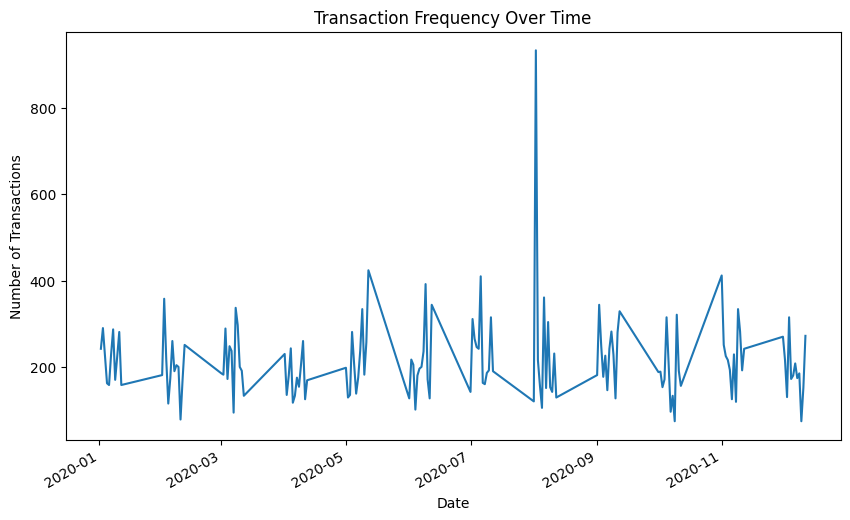

In [9]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menampilkan Distribusi Transaksi
plt.figure(figsize=(10, 6))
df['ServTransDate'] = pd.to_datetime(df['ServTransDate'])  # Convert to datetime
df['ServTransDate'].value_counts().sort_index().plot(kind='line')
plt.title('Transaction Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

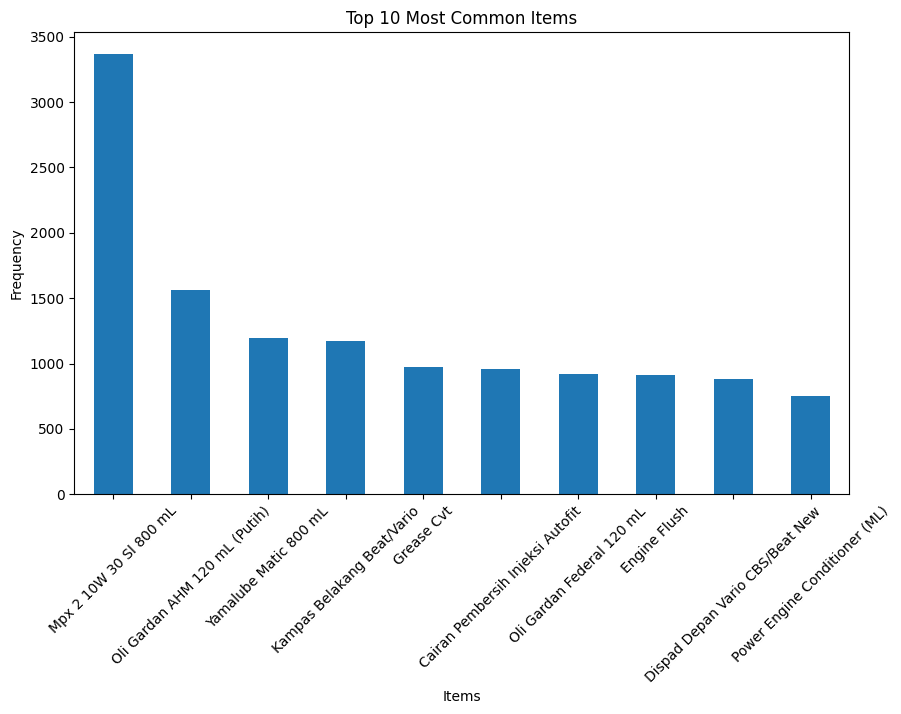

In [10]:
# Menampilkan distribusi barang penjualan
plt.figure(figsize=(10, 6))
df['Items'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Common Items')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### APRIORI DAN ASOSIASI

In [11]:
#Mengeblompokkan transaksi berdasarkan kolom ServTransCode untuk kolom Items
transaksi = df.groupby('ServTransCode')['Items'].apply(list)

#Mengubah data menjadi bentuk one-hot encoding
te = TransactionEncoder()
tf_encode = te.fit(transaksi).transform(transaksi)
tf_df = pd.DataFrame(tf_encode, columns= te.columns_)

tf_df.head()
#print(tf_df.head())


,Air Accu Isi 500 mL,Air Accu Zurr Isi 1L,Air Accu Zurr Isi 500 mL,Aki Aspira GM5Z-3B Basah,Aki Aspira GM5Z-3B Kering,Aki Aspira GTZ-5S,Aki Aspira GTZ-6V,Aki Duration GTZ-5S,Aki Gs GTZ-5S,Aki Gs GTZ-6V,...,Zeneos TL 110/70-17 50P,Zeneos TL 120/70-10 ZN87,Zeneos TL 120/70-13 4PR 53,Zeneos TL 120/70-13 58S,Zeneos TL 120/70-17 58S,Zeneos TL 130/70-17 62S,Zeneos TL 140/70-13 4PR 61,Zeneos TL 80/90-14 50P,Zeneos TL 90/80-17 46P,Zeneos TL 90/90-14 46P
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
#Memasukkan Algoritma Apriori
frequent_itemsets = apriori(tf_df, min_support=0.1, use_colnames=True)

frequent_itemsets = frequent_itemsets.round(2)
frequent_itemsets

#menaruh hasil kedalam folder data
# folder_name = 'data/Hasil'
# file_path = os.path.join(folder_name, 'hasil_apriori_2020_test.xlsx')
# frequent_itemsets.to_excel(file_path, index=False)

,support,itemsets
0,0.17,(Mpx 2 10W 30 Sl 800 mL)


In [21]:
# memasukkan Association Rules dengan menggunakan K1 1-itemset
ass_rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1, num_itemsets=1)
#Filtering kolom penting
ass_rules_col = ass_rules[['antecedents', 'consequents', 'support', 'confidence','lift' ]].round(2)
ass_rules_col 

# Antecedents
# Item atau kelompok item yang menjadi kondisi awal dalam aturan asosiasi. 
# Misalnya, (Oli Mesin Matic) menunjukkan bahwa aturan dimulai dari pembelian "Oli Mesin Matic".

# Consequents
# Item atau kelompok item yang menjadi hasil dari aturan asosiasi. 
# Misalnya, (Baut) berarti "Baut" cenderung dibeli setelah "Oli Mesin Matic".

# Support
# Proporsi transaksi yang mengandung antecedents dan consequents secara bersamaan. 
# Misalnya, 0.083333 menunjukkan bahwa 8,33% transaksi mengandung "Oli Mesin Matic" dan "Baut".

# Confidence
# Probabilitas bahwa consequents terjadi jika antecedents terjadi. 
# Misalnya, 0.125000 menunjukkan bahwa jika "Oli Mesin Matic" dibeli, ada 12,5% kemungkinan "Baut" juga dibeli.

# Lift
# Rasio pengaruh aturan dibandingkan dengan kejadian independen. Lift > 1 menunjukkan hubungan positif antara antecedents dan consequents. 
# Misalnya, 1.500000 menunjukkan bahwa pembelian "Baut" lebih mungkin terjadi jika "Oli Mesin Matic" dibeli.

# folder_name = 'data/hasil'
# file_path = os.path.join(folder_name, 'hasil_asosiasi_2020.xlsx')
# ass_rules_col.to_excel(file_path, index=False)



In [22]:
#Sorting berdasarkan Lift
ass_sort= ass_rules_col.sort_values(by = 'lift', ascending = False)
ass_sort.head()

folder_name = 'data/Hasil'
file_path = os.path.join(folder_name, 'sorted_asosiasi_2020.xlsx')
ass_sort.to_excel(file_path, index=False)

### VISUALISASI HASIL

<>:2: DeprecationWarning: invalid escape sequence \d
<>:2: DeprecationWarning: invalid escape sequence \d
C:\Users\Ameli\AppData\Local\Temp\ipykernel_25308\3632802583.py:2: DeprecationWarning: invalid escape sequence \d
  datanya = '\data\Hasil\sorted_asosiasi_cleaned.csv'


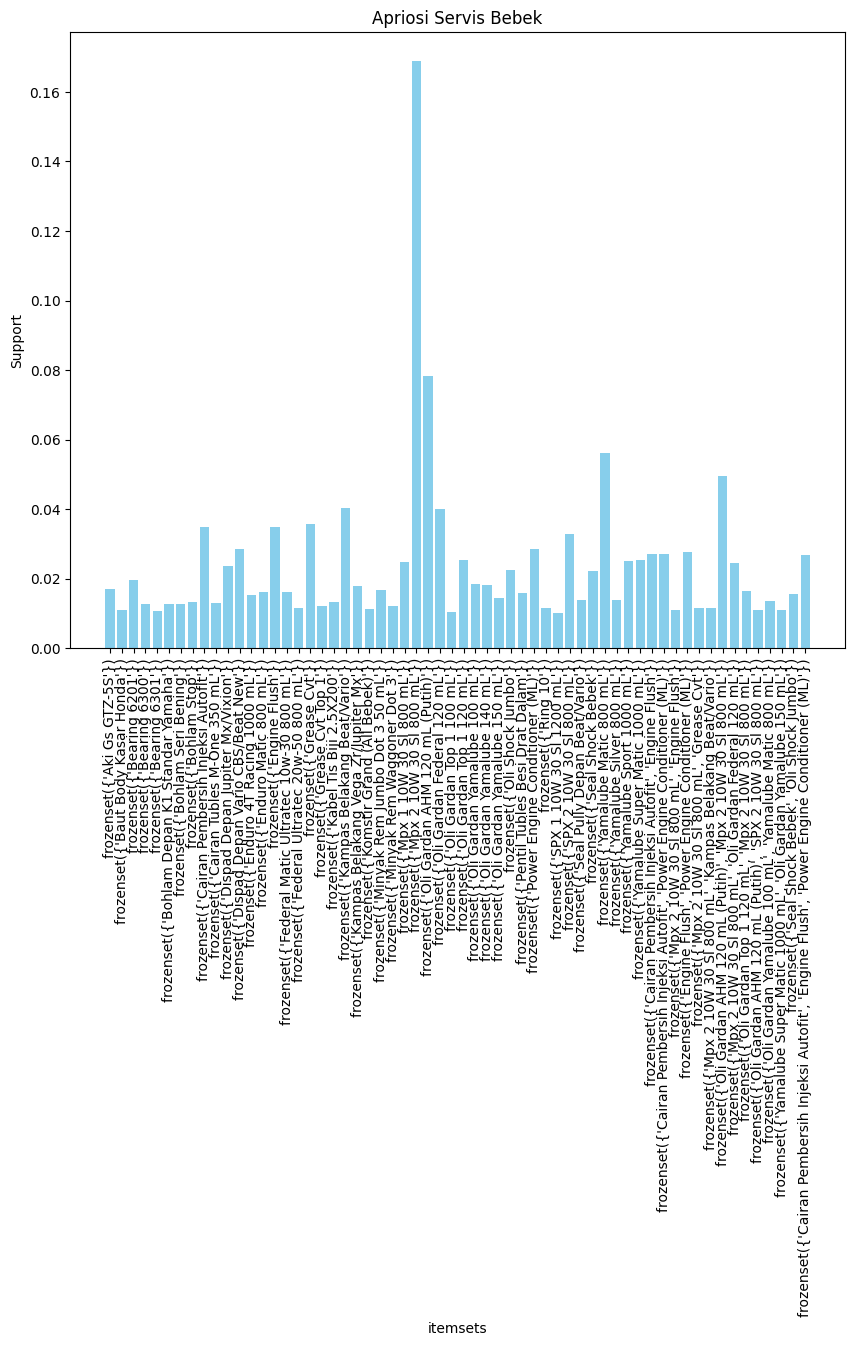

In [15]:
#Visualisasi Bar chart
datanya = '\data\Hasil\sorted_asosiasi_cleaned.csv'
plt.figure(figsize=(10,8))
plt.bar(frequent_itemsets['itemsets'].astype(str), frequent_itemsets['support'], color='skyblue')
plt.xlabel('itemsets')
plt.ylabel('Support')
plt.xticks(rotation=90)
plt.title('Apriosi Servis Bebek')
plt.show()